# Importing dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'/content/data without infertility _1.csv')
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'],errors = 'coerce')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3    Age (yrs)             541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  540 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

# Preprocessing

In [4]:
#Remove null value
# df.dropna(axis=0, how="any", inplace=True)
df.fillna(0, inplace=True)
#After removing null rows Reset the index
df.reset_index(drop=True,inplace=True)
x = df.drop(['PCOS (Y/N)','Sl. No','Patient File No.'],axis=1)
y = df['PCOS (Y/N)']

## Perform chi2 test

In [5]:
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(x,y)
f_p_values
#import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=x.columns
p_values.round(2)
#answer = str(round(p_values, 5))

 Age (yrs)               0.00
Weight (Kg)              0.00
Height(Cm)               0.44
BMI                      0.00
Blood Group              0.67
Pulse rate(bpm)          0.27
RR (breaths/min)         0.74
Hb(g/dl)                 0.60
Cycle(R/I)               0.00
Cycle length(days)       0.01
Marraige Status (Yrs)    0.00
Pregnant(Y/N)            0.61
No. of aborptions        0.09
FSH(mIU/mL)              0.00
LH(mIU/mL)               0.00
FSH/LH                   0.00
Hip(inch)                0.02
Waist(inch)              0.02
Waist:Hip Ratio          0.99
TSH (mIU/L)              0.61
AMH(ng/mL)               0.00
PRL(ng/mL)               0.72
Vit D3 (ng/mL)           0.00
PRG(ng/mL)               0.00
RBS(mg/dl)               0.03
Weight gain(Y/N)         0.00
hair growth(Y/N)         0.00
Skin darkening (Y/N)     0.00
Hair loss(Y/N)           0.00
Pimples(Y/N)             0.00
Fast food (Y/N)          0.00
Reg.Exercise(Y/N)        0.19
BP _Systolic (mmHg)      0.90
BP _Diasto

In [6]:
x = df.drop(['Sl. No',' Age (yrs)','Weight (Kg)','BMI','Cycle(R/I)','Cycle length(days)','Marraige Status (Yrs)','FSH(mIU/mL)','LH(mIU/mL)','FSH/LH','AMH(ng/mL)','Vit D3 (ng/mL)','PRG(ng/mL)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Hair loss(Y/N)','Pimples(Y/N)','Fast food (Y/N)','Follicle No. (L)','Follicle No. (R)','Patient File No.'],axis=1)
y = df['PCOS (Y/N)']

In [7]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
PCOS (Y/N),541.0,0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.000000
Height(Cm),541.0,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
Blood Group,541.0,13.802218,1.840812,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse rate(bpm),541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
RR (breaths/min),541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000
Hb(g/dl),541.0,11.160037,0.866904,8.500000,10.500000,11.000000,11.700000,14.800000
Pregnant(Y/N),541.0,0.380776,0.486027,0.000000,0.000000,0.000000,1.000000,1.000000
No. of aborptions,541.0,0.288355,0.692575,0.000000,0.000000,0.000000,0.000000,5.000000
Hip(inch),541.0,37.992606,3.967920,26.000000,36.000000,38.000000,40.000000,48.000000
Waist(inch),541.0,33.841035,3.596894,24.000000,32.000000,34.000000,36.000000,47.000000


# data spliting

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x,y,test_size=0.2,random_state=0,shuffle=True)

# ML models

Training time(seconds): 0.004673480987548828s
Accuracy 0.69
kfold accuracy: 0.6097979797979798
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        70
           1       0.59      0.44      0.50        39

    accuracy                           0.69       109
   macro avg       0.66      0.63      0.64       109
weighted avg       0.68      0.69      0.68       109



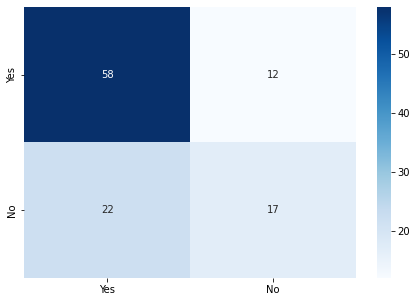

In [15]:
from sklearn.linear_model import SGDClassifier
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = SGDClassifier()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

# Linear Regression

Training time(seconds): 0.02477860450744629s
Accuracy 1.0
kfold accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



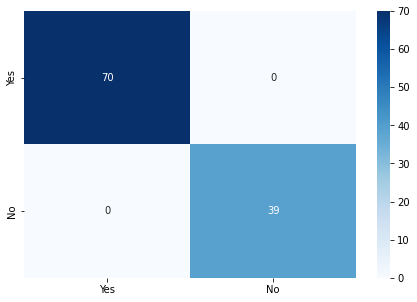

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = LinearRegression()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

# Random Forest

Training time(seconds): 0.14715337753295898s
Accuracy 1.0
kfold accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



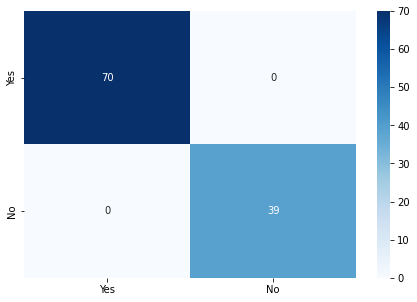

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = RandomForestClassifier(max_depth=20, random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

# Bayesian Ridge Regression

Training time(seconds): 0.004280567169189453s
Accuracy 1.0
kfold accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



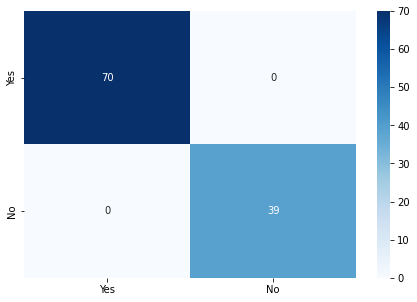

In [18]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = linear_model.BayesianRidge()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

# SVM

Training time(seconds): 0.842869758605957s
Accuracy 1.0
kfold accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



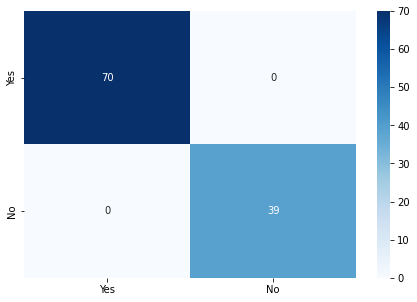

In [19]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = svm.SVC(kernel='linear')
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

# KNeighbour Regression

Training time(seconds): 0.002378702163696289s
Accuracy 0.56
kfold accuracy: 0.6064309764309764
              precision    recall  f1-score   support

           0       0.63      0.74      0.68        70
           1       0.33      0.23      0.27        39

    accuracy                           0.56       109
   macro avg       0.48      0.49      0.48       109
weighted avg       0.53      0.56      0.54       109



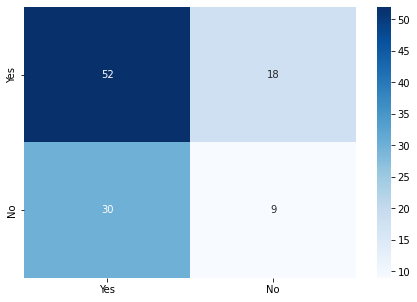

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = KNeighborsClassifier()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

# Neural Networks(MLPClassifier)

Training time(seconds): 0.592132568359375s
Accuracy 0.99
kfold accuracy: 0.9851851851851852
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        70
           1       0.97      1.00      0.99        39

    accuracy                           0.99       109
   macro avg       0.99      0.99      0.99       109
weighted avg       0.99      0.99      0.99       109



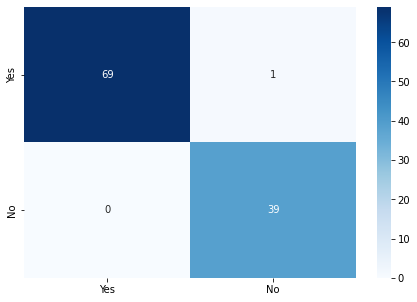

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = MLPClassifier()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

# Logistic Regression

Training time(seconds): 0.025332212448120117s
Accuracy 1.0
kfold accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



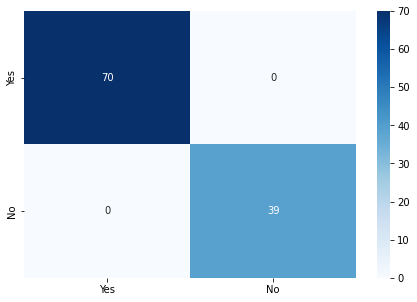

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = LogisticRegression(random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

# Gaussian Naïve Bayes

Training time(seconds): 0.002892732620239258s
Accuracy 1.0
kfold accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



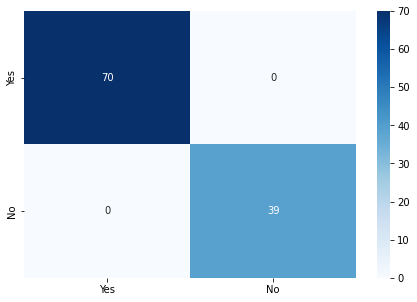

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = GaussianNB()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

# Gradient Boosting Regressor

Training time(seconds): 0.07144379615783691s
Accuracy 1.0
kfold accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        39

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



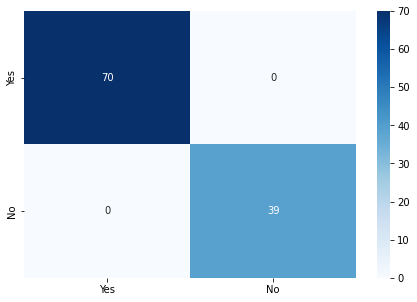

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = GradientBoostingClassifier(random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()